## Happiness among developers

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Read in three years with good data dictionaries
# NOTE: This assumes data are in a subfolder of where the notebook is being run
df19 = pd.read_csv("data/survey_results_2019.csv", header=0, low_memory=False)
df18 = pd.read_csv("data/survey_results_2018.csv", header=0, low_memory=False)
df17 = pd.read_csv("data/survey_results_2017.csv", header=0, low_memory=False)

## Job satisfaction across surveys

In [3]:
# The variable name, values, and scale all change each year 
print("2019:")
print(df19.groupby(['JobSat'])['JobSat'].count())
print("2018:")
print(df18.groupby(['JobSatisfaction'])['JobSatisfaction'].count())
print("2017:")
print(df17.groupby(['JobSatisfaction'])['JobSatisfaction'].count())

JobSat
Neither satisfied nor dissatisfied     8720
Slightly dissatisfied                 10752
Slightly satisfied                    24207
Very dissatisfied                      4857
Very satisfied                        22452
Name: JobSat, dtype: int64
JobSatisfaction
Extremely dissatisfied                 2482
Extremely satisfied                   12436
Moderately dissatisfied                6318
Moderately satisfied                  26005
Neither satisfied nor dissatisfied     4966
Slightly dissatisfied                  7057
Slightly satisfied                    10012
Name: JobSatisfaction, dtype: int64
JobSatisfaction
0.0      467
1.0      373
2.0      888
3.0     1635
4.0     1865
5.0     3749
6.0     4726
7.0     7969
8.0     8983
9.0     5573
10.0    4148
Name: JobSatisfaction, dtype: int64


In [4]:
# Map 2018 and 2019 to same scale as 2017 and reconcile variable names
dsat19 = {
    'Very dissatisfied': 0.,
    'Slightly dissatisfied': 2.5,
    'Neither satisfied nor dissatisfied': 5.,
    'Slightly satisfied': 7.5,
    'Very satisfied': 10.,
}
dsat18 = {
    'Extremely dissatisfied': 0.,
    'Moderately dissatisfied': 1*5/3,
    'Slightly dissatisfied': 2*5/3,
    'Neither satisfied nor dissatisfied': 5.,
    'Slightly satisfied': 4*5/3,
    'Moderately satisfied': 5*5/3,
    'Extremely satisfied': 10.,
}
df19['qJobSat'] = [dsat19.get(var, None) for var in df19.JobSat]
df18['qJobSat'] = [dsat18.get(var, None) for var in df18.JobSatisfaction]
df17['qJobSat'] = df17.JobSatisfaction

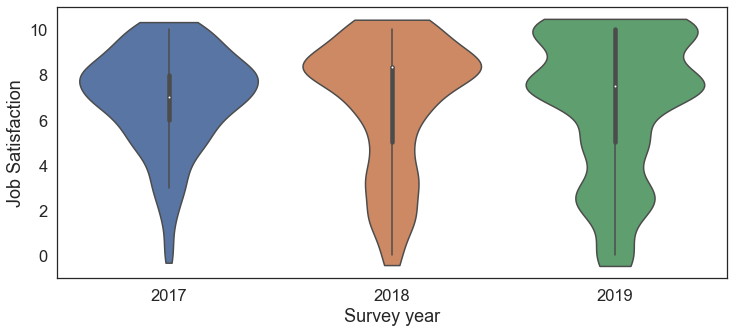

In [78]:
# Stack data to plot
df_qjs = pd.concat([
    pd.DataFrame({'year':2019, 'qJobSat':df19.qJobSat}).dropna(),
    pd.DataFrame({'year':2018, 'qJobSat':df18.qJobSat}).dropna(),
    pd.DataFrame({'year':2017, 'qJobSat':df17.qJobSat}).dropna(),
])

sns.set(style="white", font_scale=1.5)
plt.figure(figsize=(12, 5))
plt_qjs = sns.violinplot(
    y='qJobSat', x='year', hue='year', 
    data=df_qjs, bw=0.3, cut=0.5, dodge=False)
plt_qjs.set(xlabel="Survey year", ylabel="Job Satisfaction")
plt_qjs.legend_.remove()

plt.show();

## Education levels and satisfaction

In [81]:
# The variable name, values, and scale all change each year 
print("2019:")
print(df19.groupby(['EdLevel'])['EdLevel'].count())
print("2018:")
print(df18.groupby(['FormalEducation'])['FormalEducation'].count())
print("2017:")
print(df17.groupby(['FormalEducation'])['FormalEducation'].count())

2019:
EdLevel
Associate degree                                                                       2938
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
I never completed any formal education                                                  553
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Some college/university study without earning a degree                                10502
Name: EdLevel, dtype: int64
2018:
FormalEducation
Associate degree                                                                       2970
Bachelor’s degre

In [113]:
# Give everyone the same names so we can actually plot this
dedu = {
    "Associate degree":"Assoc",
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bach",
    "Bachelor's degree": "Bach",
    "I never completed any formal education": "NoEd",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "Mast",
    "Master's degree": "Mast",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "Doc",
    "Doctoral degree": "Doc",
    "Primary/elementary school": "Prim",
    "Professional degree (JD, MD, etc.)": "Prof",
    "Professional degree": "Prof",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Sec",
    "Secondary school": "Sec",
    "Some college/university study without earning a degree": "Some",
    "Some college/university study without earning a bachelor's degree": "Some",
}
df19['EdLvl'] = [dedu.get(var, None) for var in df19.EdLevel]
df18['EdLvl'] = [dedu.get(var, None) for var in df18.FormalEducation]
df17['EdLvl'] = [dedu.get(var, None) for var in df17.FormalEducation]

In [122]:
# Stack data to plot
df_edjs = pd.concat([
    pd.DataFrame({'year':2019, 'qJobSat':df19.qJobSat, 'EdLvl':df19.EdLvl}).dropna(),
    pd.DataFrame({'year':2018, 'qJobSat':df18.qJobSat, 'EdLvl':df18.EdLvl}).dropna(),
    pd.DataFrame({'year':2017, 'qJobSat':df17.qJobSat, 'EdLvl':df17.EdLvl}).dropna(),
])
df_edjs['EdLvl'] = df_edjs['EdLvl'].astype('category')
df_edjs['EdLvl'] = df_edjs.EdLvl.cat.set_categories([
    'NoEd', 'Prim', 'Sec', 'Some', 'Assoc', 'Bach', 'Mast', 'Doc', 'Prof'
     ], ordered=True)


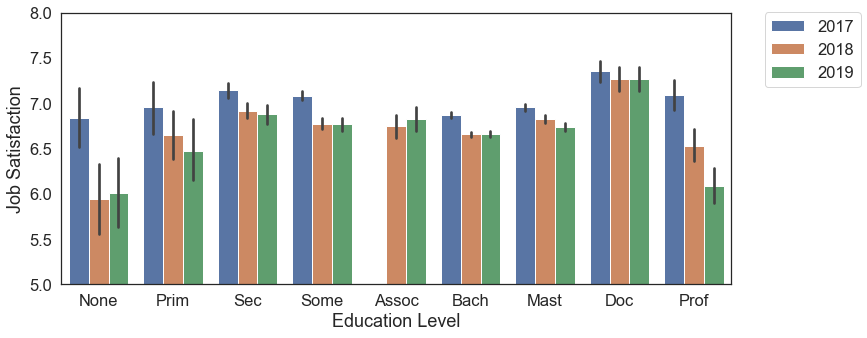

In [129]:
sns.set(style="white", font_scale=1.5)
plt.figure(figsize=(12, 5))
plt_edjs = sns.barplot(y='qJobSat', x='EdLvl', hue='year', data=df_edjs)
plt_edjs.set(ylim=(5,8), xlabel="Education Level", ylabel="Job Satisfaction")
#plt_edjs.legend_.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();
